In [1]:
##########################
# 配置运行环境
##########################

%matplotlib inline

import numpy as np
import pandas as pd
from IPython.display import Math, Latex
from matplotlib import pyplot
import seaborn as sns

# matplotlib 对中文的支持
from matplotlib import font_manager
cn_font = font_manager.FontProperties(fname='msyh.ttf', size=16)  # 网上支持中文

from matplotlib import rcParams
# rcParams['font.family'] = 'Microsoft YaHei'  # 本地支持中文

# 保存为 pdf 格式
rcParams['pdf.fonttype'] = 42
rcParams['figure.figsize'] = (8,5)

# Look pretty...
from matplotlib import style
style.use('ggplot')

# 设置 numpy 的输出精度, 并且阻止使用科学记数法
np.set_printoptions(precision=6, suppress=True)

# 离散随机变量的期望

### 模拟射击的期望

已知甲、乙两名战士的射击水平如下

- 甲战士

| 取值 | 6 | 7 | 8 | 9 | 10 |
|-----|---|---|---|---|---|
| 概率 | 0.2 | 0.4 | 0.0 | 0.1 | 0.3 |

- 乙战士

| 取值 | 6 | 7 | 8 | 9 | 10 |
|-----|---|---|---|---|---|
| 概率 | 0.0 | 0.2 | 0.5 | 0.3 | 0.0 |

模拟两人的射击情况

In [2]:
from scipy.stats import rv_discrete

def simShooting(name: str, pmf: dict, n: int=1) -> list:
    """
    模拟射击，返回射击成绩列表和汇总表
    
    name: 射手姓名
    pmf: 射手的射击水平字典，key 表示环数，value 表示概率
    n: 射击次数
    """
    
    # 定义一个服从给定分布的随机变量
    X = rv_discrete(values=zip(*pmf.items()))
    
    # 生成 n 个观测值
    samples = pd.Series(X.rvs(size=n))
    
    # 统计数据的频次
    counts = samples.value_counts()
    
    reports = pd.DataFrame({"环数": counts.index, "次数": counts.values, "频率": counts.values/n})
    
    print('战士{}射击 {} 次的成绩: {}'.format(name, n, samples.values.tolist()))
    print(reports.sort_values(by='环数').to_string(index=False, float_format='{:.3f}'.format, col_space=8))
    print('战士{}射击的平均环数为: {}'.format(name, samples.mean()))

In [3]:
# 两名战士的射击水平分布
pmf_A = {6: 0.2, 7: 0.4, 8: 0.0, 9:0.1, 10: 0.3}
pmf_B = {6: 0.0, 7: 0.5, 8: 0.2, 9:0.3, 10: 0.0}

# 射击次数
n = 100

In [4]:
simShooting("甲", pmf_A, n)

战士甲射击 100 次的成绩: [10, 6, 10, 10, 6, 7, 9, 7, 6, 10, 10, 10, 7, 7, 7, 7, 10, 7, 9, 10, 10, 6, 6, 7, 7, 9, 10, 10, 6, 7, 10, 10, 10, 10, 7, 6, 7, 7, 10, 7, 7, 10, 10, 10, 9, 10, 6, 6, 7, 7, 9, 6, 6, 7, 6, 7, 9, 10, 7, 9, 7, 7, 6, 6, 10, 6, 9, 6, 7, 7, 7, 7, 10, 7, 7, 10, 7, 10, 6, 6, 6, 7, 10, 6, 10, 7, 9, 6, 7, 10, 10, 6, 6, 6, 7, 6, 7, 10, 10, 7]
      环数       次数       频率
       6       25    0.250
       7       35    0.350
       9        9    0.090
      10       31    0.310
战士甲射击的平均环数为: 7.86


In [5]:
simShooting("乙", pmf_B, n)

战士乙射击 100 次的成绩: [7, 9, 7, 9, 9, 9, 7, 9, 9, 7, 8, 7, 9, 8, 8, 8, 8, 7, 9, 9, 7, 7, 9, 8, 7, 7, 7, 7, 7, 7, 9, 8, 7, 7, 9, 8, 9, 7, 7, 7, 9, 8, 7, 8, 7, 7, 9, 7, 9, 7, 8, 7, 7, 8, 9, 7, 9, 7, 8, 7, 7, 7, 7, 9, 7, 7, 8, 9, 7, 9, 8, 8, 9, 7, 7, 7, 7, 9, 7, 8, 7, 8, 9, 7, 9, 9, 7, 7, 7, 7, 7, 9, 7, 7, 7, 9, 9, 7, 7, 7]
      环数       次数       频率
       7       53    0.530
       8       18    0.180
       9       29    0.290
战士乙射击的平均环数为: 7.76


我们看看随着射击次数的增加期望值的变化。

In [6]:
X = rv_discrete(values=zip(*pmf_A.items()))
Y = rv_discrete(values=zip(*pmf_B.items()))
for n in range(1, 7):
    print('甲战士射击 {} 次的平均环数为：{:.3f}'.format(10**n, X.rvs(size=10**n).mean()))
    print('乙战士射击 {} 次的平均环数为：{:.3f}'.format(10**n, Y.rvs(size=10**n).mean()))
    print()

甲战士射击 10 次的平均环数为：8.400
乙战士射击 10 次的平均环数为：7.900

甲战士射击 100 次的平均环数为：7.790
乙战士射击 100 次的平均环数为：8.020

甲战士射击 1000 次的平均环数为：7.950
乙战士射击 1000 次的平均环数为：7.809

甲战士射击 10000 次的平均环数为：7.902
乙战士射击 10000 次的平均环数为：7.797

甲战士射击 100000 次的平均环数为：7.899
乙战士射击 100000 次的平均环数为：7.804

甲战士射击 1000000 次的平均环数为：7.902
乙战士射击 1000000 次的平均环数为：7.801



### 验血次数问题

若有 $n$ 人参加疾病普查，每个人化验结果呈阳性的概率都为 $p$，如何分组工作量最小.

验血总次数 $X$ 的期望为 $E(X) = \frac{n}{k}(1+k-k(1-p)^k)$.

我们通过观测图像的方式找最优的 $k$ 值.

In [7]:
def expectTestTimes(n, p, k):
    """
    返回对 n 人的血液分为 k 人一组化验时，总的化验次数的期望值，其中每个人呈阳性的概率为 p.
    """
    return (n/k)*(1+k-k*(1-p)**k)

In [8]:
def bestGroupNum(n: int, p: float):
    """
    绘制对 n 人的血液分为 k 人一组化验时，总的化验次数的期望值的图像，其中每个人呈阳性的概率为 p.
    注意，我们的图像是从 k = 2 开始的.
    
    n: 参加的人数
    p: 每个人呈阳性的概率
    """
    x = np.arange(2, n+1)
    pyplot.figure()
    pyplot.plot(x, (n/x)*(1+x-x*(1-p)**x), '.-b', linewidth=0.5)
    pyplot.xlim(1, n/2)

    pyplot.title('验血的最优分组数 $p={}$'.format(p), fontproperties=cn_font)
    pyplot.xlabel('每组的人数', fontproperties=cn_font)
    pyplot.ylabel('总验血次数', fontproperties=cn_font)
    pyplot.show()

注意，我们的图像是从每组两人开始绘制的.

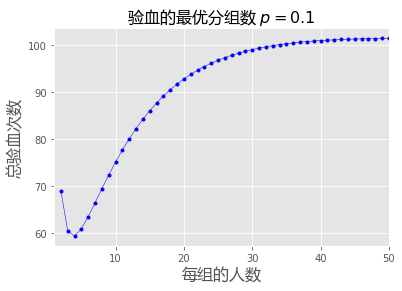

In [9]:
bestGroupNum(100, 0.1)

当检验人数为 100 人时，若每个人验血呈阳性的概率为 0.1，则最优分组人数为 4，此时期望的总验血次数为 59 次，能减少 40% 的工作量！

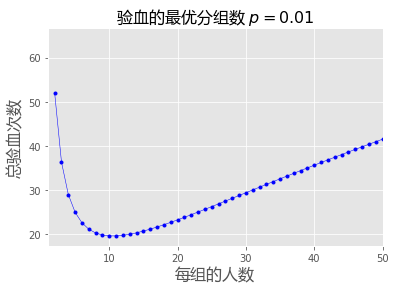

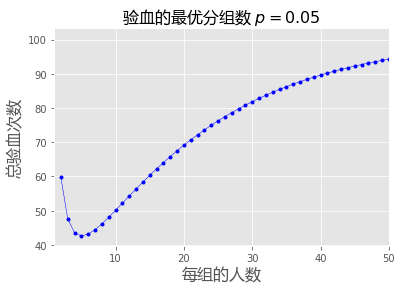

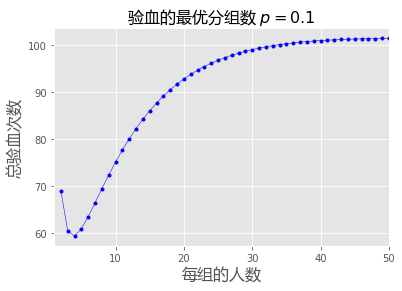

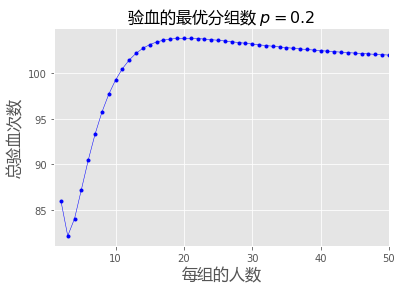

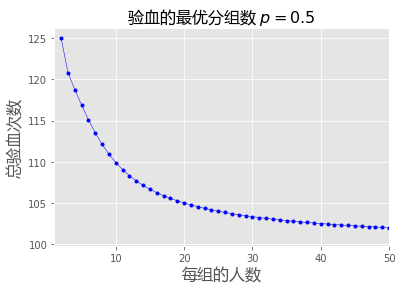

In [10]:
for p in [0.01, 0.05, 0.1, 0.2, 0.5]:
    bestGroupNum(100, p)

### 进货量问题

商场销售某品牌时装，每卖出一件可获纯利润 $b$ 元, 如果流行季结束仍未卖出, 则每件损失 $r$ 元. 整个流行季中该商品的需求量 $X$ 服从参数 $\lambda$ 的泊松分布. 现在商店决定销售季前要进货, 问它要进多少件才能使得期望利润最大化.

In [23]:
from scipy.stats import poisson

def expectProfit(profit, loss, inventory, demands_pmf):
    """
    返回在给定的进货量下，期望收益的值。
    
    profit: 每件卖出商品获得的纯利润
    loss: 每件未卖出商品的损失
    demands_pmf: 需求量分布，我们用 pandas 的 Series 存储分布列函数，其中 index 为取值，value 为概率
    inventory: 进货量
    """
    demands = demands_pmf.index.values
    profits = np.where(demands < inventory, demands*profit - (inventory-demands)*loss, inventory*profit)
    return np.dot(profits, demands_pmf)

def simExpectProfit(profit, loss, demands_pmf):
    """
    绘制不同进货量下期望利润的图形
    
    profit: 每件卖出商品获得的纯利润
    loss: 每件未卖出商品的损失
    demands_pmf: 需求量分布
    """
    x = range(0, 100)
    y = [expectProfit(profit, loss, inventory, demands_pmf) for inventory in x]

    pyplot.figure()
    pyplot.plot(x, y, '.-b', linewidth=0.5)

    pyplot.title('期望利润最大化问题', fontproperties=cn_font)
    pyplot.xlabel('进货数', fontproperties=cn_font)
    pyplot.ylabel('总利润', fontproperties=cn_font)
    pyplot.show()

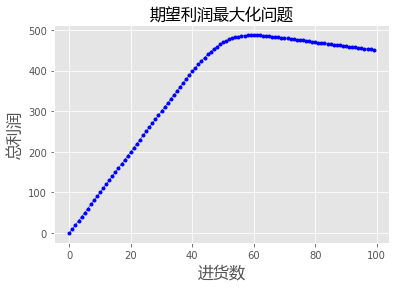

In [29]:
# 顾客需求服从参数为 lamb 的泊松分布，其中 lamb 为一个销售季平均卖出的商品数
lamb = 50
demands = np.arange(500)
demands_pmf = pd.Series(poisson(lamb).pmf(demands), index=demands)

# profit 为每件卖出商品的获利, loss 为每件未卖出商品的损失
profit, loss = 10, 1

simExpectProfit(profit, loss, demands_pmf)

# 离散随机变量的方差

方差显示了随机变量的取值对其均值的偏离程度。我们可以利用方差来衡量不确定性，越大的方差意味着越大的不确定性。

In [13]:
# 战士甲、乙射击水平的概率分布
pmf_A = {6: 0.2, 7: 0.4, 8: 0.0, 9:0.1, 10: 0.3}
pmf_B = {6: 0.0, 7: 0.5, 8: 0.2, 9:0.3, 10: 0.0}

# 定义随机变量 X, Y 分别服从战士甲、乙的分布
X = rv_discrete(values=zip(*pmf_A.items()))
Y = rv_discrete(values=zip(*pmf_B.items()))

我们直观的看一下射击时两个战士发挥的稳定性

In [14]:
def stabilityOfShooting(name: str, pmf: dict, n: int):
    """
    绘制射击 n 次的稳定性图形
    
    name: 射手名称
    pmf: 射手的水平的概率分布字典
    n: 射击次数
    """
    X = rv_discrete(values=zip(*pmf.items()))
    
    fig = pyplot.figure()
    
    pyplot.plot(range(n), X.rvs(size=n), 'o--', linewidth=1, ms=3)
    pyplot.hlines(X.mean(), -1, n+1, colors='b', lw=2)

    # 画图范围
    pyplot.xlim(-1, n+1)
    pyplot.ylim(5.5, 10.5)

    pyplot.title('战士{}射击的稳定性'.format(name), fontproperties=cn_font)
    pyplot.xlabel('次数', fontproperties=cn_font)
    pyplot.ylabel('环数', fontproperties=cn_font)
    pyplot.show()

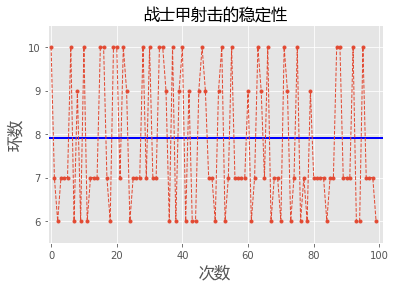

In [15]:
stabilityOfShooting('甲', pmf_A, 100)

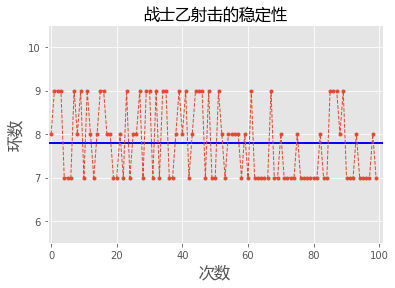

In [16]:
stabilityOfShooting('乙', pmf_B, 100)

下面，我们考察如果只射击一次，两名战士谁的胜面大一些

In [17]:
from collections import Counter

# 试验次数
trails = 10000

results_A = X.rvs(size=trails)
results_B = Y.rvs(size=trails)

for i in range(10):
    print('第 {:2d} 次比拼，战士甲为 {:2d} 环，战士乙为 {:2d} 环.'.format(i+1, results_A[i], results_B[i]))
    
wins = Counter(['甲胜' if a > b else '乙胜' if b > a else '平局' for a,b in zip(results_A, results_B)])

print()
print('比拼 {} 次，其中甲胜 {:2d} 局，乙胜 {:2d} 局，平手 {:2d} 局.'.format(trails, wins['甲胜'], wins['乙胜'], wins['平局']))

第  1 次比拼，战士甲为  6 环，战士乙为  7 环.
第  2 次比拼，战士甲为  9 环，战士乙为  9 环.
第  3 次比拼，战士甲为  9 环，战士乙为  7 环.
第  4 次比拼，战士甲为 10 环，战士乙为  7 环.
第  5 次比拼，战士甲为  7 环，战士乙为  9 环.
第  6 次比拼，战士甲为  7 环，战士乙为  7 环.
第  7 次比拼，战士甲为 10 环，战士乙为  7 环.
第  8 次比拼，战士甲为  9 环，战士乙为  7 环.
第  9 次比拼，战士甲为  9 环，战士乙为  7 环.
第 10 次比拼，战士甲为 10 环，战士乙为  8 环.

比拼 10000 次，其中甲胜 3743 局，乙胜 3949 局，平手 2308 局.


这里，我们发现，虽然 A 战士平均看来更好，但是 B 战士的发挥更稳定，在给定的规则下，胜的可能性反而更大.

In [18]:
print("战士 A 的期望为 {:.2f}，方差为 {:.3f}.".format(X.mean(), X.var()))
print("战士 B 的期望为 {:.2f}，方差为 {:.3f}.".format(Y.mean(), Y.var()))

战士 A 的期望为 7.90，方差为 2.490.
战士 B 的期望为 7.80，方差为 0.760.


 当然，方差的波动有两种情形，可能朝好的方向波动，也可能朝坏的方向波动。因此也不一定方差越大越不好。例如在股票投资中，期望表示预期收益，方差表示风险。这里风险是个中性词，实际收益好于预期也是风险，当然，这种风险是我们想要的。

### 离散分布方差计算器

In [19]:
from scipy.stats import rv_discrete

pmf = {1: 0.1, 2: 0.2, 3: 0.4, 4:0.2, 5: 0.1}

X = rv_discrete(values=zip(*pmf.items()))

print('方差为 {}，标准差为 {}'.format(X.var(), X.std()))

方差为 1.1999999999999993，标准差为 1.095445115010332


## 应用实例 风险决策问题

有 3 家公司提供给某硕士毕业生就职面试的机会．按面试的时间顺序分别记为 A, B, C, 每家公司都可以提供极好、好和一般三种职位．每家公司根据面试结果决定给予求职者何种职位或拒绝提供职位．若公司决定给予职位后求职者必须立即决定接受或拒绝，且不允许毁约；咨询专家对该毕业生的学业和综合素质进行评估后给出他获得各公司职位的可能性. 三家公司提供的工资数据为已知，问该毕业生在面试时对各公司提供的职位应如何决策？

这类问题的特点是：首先，决策者面临的状态具有不确定性；其次，决策者可以获得关于这种不确定性的某种信息；最后，决策者都希望通过自己的决策获得某种利益的最优．

假设咨询专家对该毕业生的学业和综合素质进行评估后认为他获得在各公司的面试中获得极好、好或一般职位的概率分别为0.2, 0.3, 0.4, 有 0.1 的概率落选. 三家公司提供的工资数据如下表所示．该毕业生在面试时对各公司提供的职位应如何决策，能使工资数最大？

In [6]:
# 三家公司各个职位的工资数据
companies = ['A', 'B', 'C']
jobs = ['excellent', 'good', 'ordinary', 'lose']
salary = pd.DataFrame([[3500, 3900, 4000],
                      [3000, 2950, 3000],
                      [2200, 2500, 2500],
                      [0, 0, 0]],
                     columns=companies, index=jobs)
salary

,A,B,C
excellent,3500,3900,4000
good,3000,2950,3000
ordinary,2200,2500,2500
lose,0,0,0


In [8]:
# 面试取得各个职位的概率
probs = pd.Series([0.2, 0.3, 0.4, 0.1], index=jobs)
probs

excellent    0.2
good         0.3
ordinary     0.4
lose         0.1
dtype: float64

由于面试时间有先后，所以应聘前面的公司时，若被公司拒绝或自已拒绝某种职位后还可继续参加后面公司的面试，所以此问题应先考虑公司 C. 以公司 C 的期望工资值作为保底标准.

In [13]:
expect_salary = salary.T.dot(probs)

In [15]:
expect_salary['C']

2700.0

再考虑公司 B. 公司 B 的一般职位工资为 2500 元，低千公司 C 的工资期望值，所以我们的决策应为只接受公司 B 提供的极好或好的职位，否则就到公司 C 应聘．如此决策的工资期望值为

In [16]:
0.2*3900 + 0.3*2950 + 0.5*2700

3015.0

最后考虑公司 A, 显然，只应接受公司 A 的极好职位．

In [17]:
0.2*3500 + 0.8*3015

3112.0

最终决策为：去公司 A 应聘时，若提供极好职位就接受；否则去公司 B 应聘．若公司 B 提供极好或好的职位就接受，否则去公司 C 应聘，接受其提供的任何职位．在这一决策下该应聘者的工资期望值为 3112 元.

### 练习

某国政府给某外国石油公司提供了如下选择：在海域 A 钻井或在海域 B 钻井，但不能同时在两海域钻井．若在海域 A 钻井，打出油的可能性为 0.4, 收益为 7700 万元；若在海域 B 钻井，打出油的可能性为 0.2, 收益为 19500 万元设钻井费用为 3100 万元该石油公司拟采取以下 3 种方案之一：

1. 选择一个海域钻井；
2. 拒绝；
3. 选一个海域进行调研（费用为600 万元），然后决定是否钻井．若该海域有油，调研成功率为80%; 无油时，调研断言为有油的可能性为40%.

试为该公司对各方案进行分析并作出决策．